In [83]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from DecisionTree import Decision_Tree
import time
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from RandomForest import RandomForestClassifier as CustomForest

## Preprocessing titanic dataset

In [84]:
df_train = pd.read_csv("titanic/train.csv")


In [85]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [86]:
df_train = pd.read_csv("titanic/train.csv")
df_train['Has_Cabin'] = df_train['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
df_train.drop('Cabin', axis=1, inplace=True)
df_train['Age'] = df_train.Age.fillna(df_train.Age.median())
df_train['Fare'] = df_train.Fare.fillna(df_train.Fare.median())
df_train.dropna(inplace=True)
df_train['Sex'] = df_train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df_train['Embarked'] = df_train['Embarked'].map( {'C': 0, 'S': 1, 'Q': 2} ).astype(int)
X = df_train[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked', 'Has_Cabin']]
Y = df_train['Survived']

In [87]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    int64  
 11  Has_Cabin    889 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 90.3+ KB


/tmp/ipykernel_897/2014991043.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train.corr()


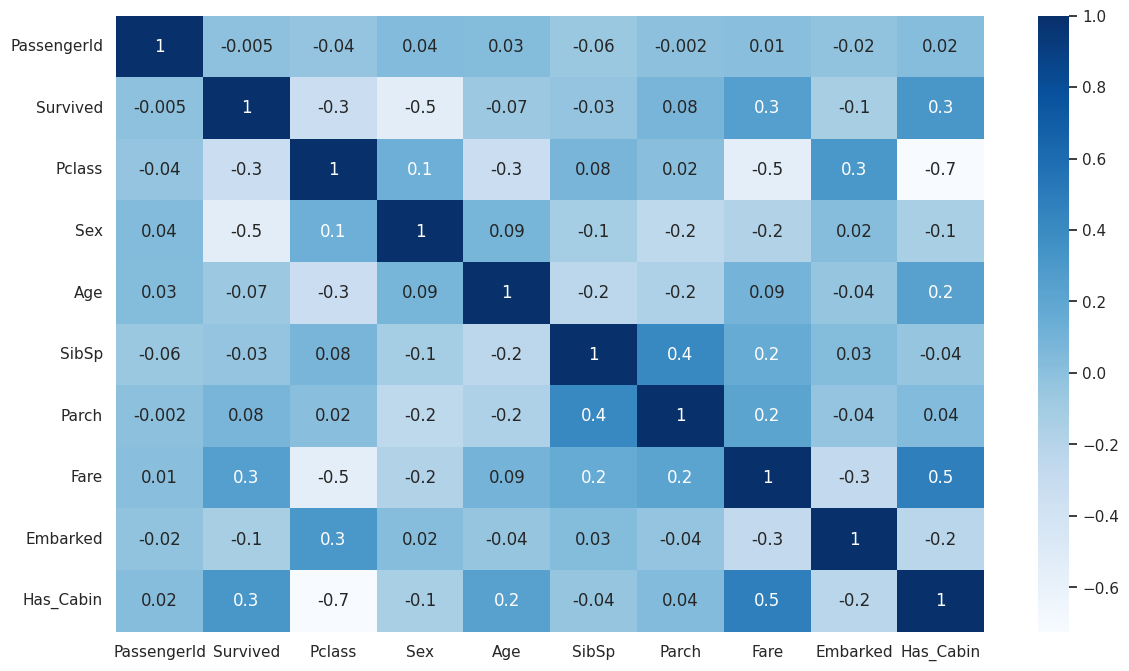

In [88]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df_train.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [89]:
X_train_titanic, X_test_titanic, Y_train_titanic, Y_test_titanic = train_test_split(X, Y, test_size = 0.2, random_state = 1, stratify = Y)


## Titanic

In [90]:
### DECISON TREE
#Predict values for decision tree for sklearn titanic dataset
print("-TITANIC-")
scikit_tree_start = time.time()
decision_tree = DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(X_train_titanic, Y_train_titanic)
Y_pred_standard = decision_tree.predict(X_test_titanic)
scikit_tree_time = time.time() - scikit_tree_start
print("scikit decison tree finished...")

-TITANIC-
scikit decison tree finished...


In [91]:
#Predict values for custom implementation titanic dataset
custom_tree_start = time.time()
custom_decision_tree = Decision_Tree(X_train_titanic, Y_train_titanic, max_depth = 3)
custom_decision_tree.build_tree()
Y_pred_custom = custom_decision_tree.predict(X_test_titanic)
custom_tree_time = time.time() - custom_tree_start
print("custom decison tree finished...")

######################################

custom decison tree finished...


In [92]:
scikit_tree_start2 = time.time()
decision_tree2 = DecisionTreeClassifier(max_depth = 20)
decision_tree2.fit(X_train_titanic, Y_train_titanic)
Y_pred_standard2 = decision_tree2.predict(X_test_titanic)
scikit_tree_time2 = time.time() - scikit_tree_start2
print("scikit decison tree finished...")

scikit decison tree finished...


In [93]:
#Predict values for custom implementation titanic dataset
custom_tree_start2 = time.time()
custom_decision_tree2 = Decision_Tree(X_train_titanic, Y_train_titanic, max_depth = 20)
custom_decision_tree2.build_tree()
Y_pred_custom2 = custom_decision_tree2.predict(X_test_titanic)
custom_tree_time2 = time.time() - custom_tree_start
print("custom decison tree finished...") 

custom decison tree finished...


In [94]:
### RANDOM FOREST
#Predict values for random forest for sklearn titanic dataset
scikit_forest_start = time.time()
random_forest = RandomForestClassifier(n_estimators = 100,max_depth = 3)
random_forest.fit(X_train_titanic, Y_train_titanic)
Y_pred_forest = random_forest.predict(X_test_titanic)
scikit_forest_time = time.time() - scikit_forest_start
print("scikit random forest finished...")



scikit random forest finished...


In [95]:
#Predict values for custom implementation titanic dataset
custom_forest_start = time.time()
custom_forest_tree = CustomForest( X_train_titanic, Y_train_titanic,max_depth = 3,n_estimators = 100)
custom_forest_tree.grow_random_forest()
Y_pred_custom_forest = custom_forest_tree.predict(X_test_titanic)
custom_forest_time = time.time() - custom_forest_start
print("custom random forest finished...")

custom random forest finished...


In [96]:
print("--------------------------------Decision tree for Titanic dataset----------------------------------------------------------")
print("Accuracy for standard implementation decision tree:", round(metrics.accuracy_score(Y_test_titanic, Y_pred_standard) * 100, 2))
print("Accuracy for custom implementation of decision tree:", round(metrics.accuracy_score(Y_test_titanic, Y_pred_custom) * 100, 2))

print("Precison for standard implementation decision tree:", round(metrics.precision_score(Y_test_titanic, Y_pred_standard) * 100, 2))
print("Precison for custom implementation of decision tree:", round(metrics.precision_score(Y_test_titanic, Y_pred_custom) * 100, 2))

print("Recall for standard implementation decision tree:", round(metrics.recall_score(Y_test_titanic, Y_pred_forest) * 100, 2))
print("Recall for custom implementation of decision tree:", round(metrics.recall_score(Y_test_titanic, Y_pred_custom) * 100, 2))

print(f"Standard tree action time: {scikit_tree_time}s")
print(f"Custom tree action time: {custom_tree_time}s")
print("---------------------------------------------------------------------------------------------------------------------------")

--------------------------------Decision tree for Titanic dataset----------------------------------------------------------
Accuracy for standard implementation decision tree: 82.58
Accuracy for custom implementation of decision tree: 82.58
Precison for standard implementation decision tree: 82.46
Precison for custom implementation of decision tree: 82.46
Recall for standard implementation decision tree: 64.71
Recall for custom implementation of decision tree: 69.12
Standard tree action time: 0.02170538902282715s
Custom tree action time: 1.3467841148376465s
---------------------------------------------------------------------------------------------------------------------------


In [97]:
print("-------------------------------- Random forest for Titanic dataset --------------------------------------------------------")
print("Accuracy for standard implementation of random forest:",round(metrics.accuracy_score(Y_test_titanic, Y_pred_forest) * 100, 2))
print("Accuracy for custom implementation of random forest:",round(metrics.accuracy_score(Y_test_titanic, Y_pred_custom_forest) * 100, 2))

print("Precison for standard implementation decision tree:", round(metrics.precision_score(Y_test_titanic, Y_pred_forest) * 100, 2))
print("Precison for custom implementation of decision tree:", round(metrics.precision_score(Y_test_titanic, Y_pred_custom_forest) * 100, 2))

print("Recall for standard implementation decision tree:", round(metrics.recall_score(Y_test_titanic, Y_pred_forest) * 100, 2))
print("Recall for custom implementation of decision tree:", round(metrics.recall_score(Y_test_titanic, Y_pred_custom_forest) * 100, 2))

print(f"Standard random forest action time: {scikit_forest_time}s")
print(f"Custom random forest action time: {custom_forest_time}s")
print("---------------------------------------------------------------------------------------------------------------------------")

-------------------------------- Random forest for Titanic dataset --------------------------------------------------------
Accuracy for standard implementation of random forest: 83.15
Accuracy for custom implementation of random forest: 83.15
Precison for standard implementation decision tree: 88.0
Precison for custom implementation of decision tree: 82.76
Recall for standard implementation decision tree: 64.71
Recall for custom implementation of decision tree: 70.59
Standard random forest action time: 0.21950483322143555s
Custom random forest action time: 76.35340762138367s
---------------------------------------------------------------------------------------------------------------------------


## Parkinson

In [98]:
#Preprocessing data for Parkinson disease dataset
df = pd.read_csv('parkinson/parkinsons.csv')
features_parkinson = df.loc[:, ~df.columns.isin([ 'status', 'name' ])]
Y_parkinson = df['status']

/tmp/ipykernel_897/904275108.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


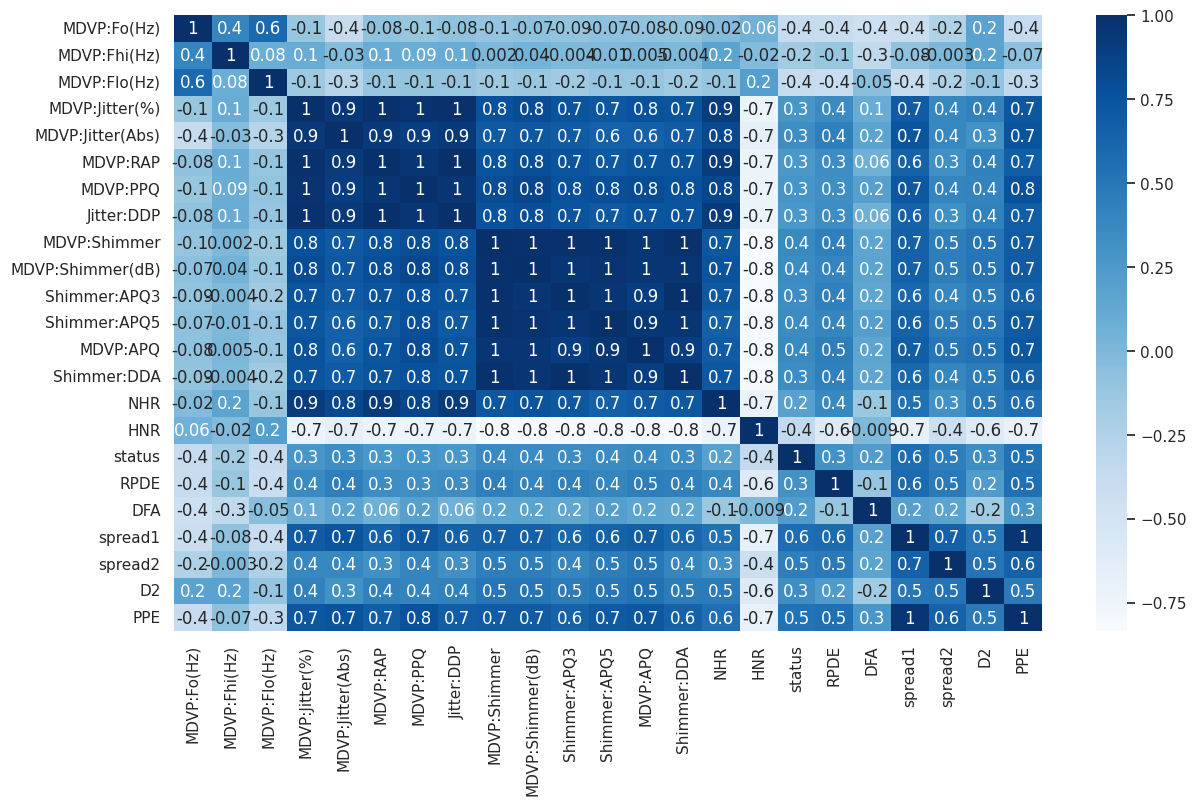

In [99]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [100]:
#Scaling values to -1; 1
scaler = MinMaxScaler((-1,1))
scaled_features = scaler.fit_transform(features_parkinson.values)
X_parkinson = pd.DataFrame(scaled_features, index = features_parkinson.index, columns = features_parkinson.columns)

X_train_parkinson, X_test_parkinson, Y_train_parkinson, Y_test_parkinson = train_test_split(X_parkinson, Y_parkinson, test_size = 0.2, random_state = 1, stratify = Y_parkinson)

In [101]:
print("-PARKINSON-")
#Predict values for decision tree for sklearn Parkinson dataset
scikit_tree_start_parkinson = time.time()
decision_tree_parkinson = DecisionTreeClassifier(max_depth = 3)
decision_tree_parkinson.fit(X_train_parkinson, Y_train_parkinson)
Y_pred_standard_parkinson = decision_tree_parkinson.predict(X_test_parkinson)
scikit_tree_time_parkinson = time.time() - scikit_tree_start_parkinson
print("scikit decison tree finished...")

-PARKINSON-
scikit decison tree finished...


In [102]:
#Predict values for custom implementation Parkinson dataset
custom_tree_start_parkinson = time.time()
custom_decision_tree = Decision_Tree(X_train_parkinson, Y_train_parkinson, max_depth = 3)
custom_decision_tree.build_tree()
Y_pred_custom_parkinson = custom_decision_tree.predict(X_test_parkinson)
custom_tree_time_parkinson = time.time() - custom_tree_start
print("custom decison tree finished...")

custom decison tree finished...


In [103]:
#Predict values for sklearn random forest for Parkinson dataset
scikit_random_forest_start_parkinson = time.time()
scikit_random_forest_parkinson = RandomForestClassifier(max_depth = 3, n_estimators = 100)
scikit_random_forest_parkinson.fit(X_train_parkinson, Y_train_parkinson)
Y_pred_scikit_random_forest_parkinson = scikit_random_forest_parkinson.predict(X_test_parkinson)
scikit_random_forest_time_parkinson = time.time() - scikit_random_forest_start_parkinson
print("scikit random forest finished...")


scikit random forest finished...


In [104]:
custom_forest_start_parkinson = time.time()
custom_forest_tree_parkinson = CustomForest( X_train_parkinson, Y_train_parkinson, max_depth = 3, n_estimators = 100)
custom_forest_tree_parkinson.grow_random_forest()
Y_pred_custom_forest_parkinson = custom_forest_tree_parkinson.predict(X_test_parkinson)
custom_forest_time_parkinson = time.time() - custom_forest_start_parkinson
print("custom random forest finished...")

custom random forest finished...


In [105]:
print("--------------------------------Decision tree for Parkinson dataset----------------------------------------------------------")
print("Accuracy for standard implementation decision tree:", round(metrics.accuracy_score(Y_test_parkinson, Y_pred_standard_parkinson) * 100, 2))
print("Accuracy for custom implementation of decision tree:", round(metrics.accuracy_score(Y_test_parkinson, Y_pred_custom_parkinson) * 100, 2))

print("Precison for standard implementation decision tree:", round(metrics.precision_score(Y_test_parkinson, Y_pred_standard_parkinson) * 100, 2))
print("Precison for custom implementation of decision tree:", round(metrics.precision_score(Y_test_parkinson, Y_pred_custom_parkinson) * 100, 2))

print("Recall for standard implementation decision tree:", round(metrics.recall_score(Y_test_parkinson, Y_pred_standard_parkinson) * 100, 2))
print("Recall for custom implementation of decision tree:", round(metrics.recall_score(Y_test_parkinson, Y_pred_custom_parkinson) * 100, 2))

print(f"Standard tree action time: {scikit_tree_time_parkinson}s")
print(f"Custom tree action time: {custom_tree_time_parkinson}s")
print("---------------------------------------------------------------------------------------------------------------------------")

--------------------------------Decision tree for Parkinson dataset----------------------------------------------------------
Accuracy for standard implementation decision tree: 79.49
Accuracy for custom implementation of decision tree: 79.49
Precison for standard implementation decision tree: 83.87
Precison for custom implementation of decision tree: 83.87
Recall for standard implementation decision tree: 89.66
Recall for custom implementation of decision tree: 89.66
Standard tree action time: 0.01131439208984375s
Custom tree action time: 90.97288417816162s
---------------------------------------------------------------------------------------------------------------------------


In [106]:
print("-------------------------------- Random forest for Parkinson dataset-------------------------------------------------------")
print("Accuracy for standard implementation random forest:", round(metrics.accuracy_score(Y_test_parkinson, Y_pred_scikit_random_forest_parkinson) * 100, 2))
print("Accuracy for custom implementation of random forest:", round(metrics.accuracy_score(Y_test_parkinson,  Y_pred_custom_forest_parkinson) * 100, 2))

print("Precison for standard implementation decision tree:", round(metrics.precision_score(Y_test_parkinson, Y_pred_scikit_random_forest_parkinson) * 100, 2))
print("Precison for custom implementation of decision tree:", round(metrics.precision_score(Y_test_parkinson, Y_pred_custom_forest_parkinson) * 100, 2))

print("Recall for standard implementation decision tree:", round(metrics.recall_score(Y_test_parkinson, Y_pred_scikit_random_forest_parkinson) * 100, 2))
print("Recall for custom implementation of decision tree:", round(metrics.recall_score(Y_test_parkinson, Y_pred_custom_forest_parkinson) * 100, 2))

print(f"Standard tree action time: {scikit_random_forest_time_parkinson}s")
print(f"Custom tree action time: {custom_forest_time_parkinson}s")
print("---------------------------------------------------------------------------------------------------------------------------")

-------------------------------- Random forest for Parkinson dataset-------------------------------------------------------
Accuracy for standard implementation random forest: 89.74
Accuracy for custom implementation of random forest: 87.18
Precison for standard implementation decision tree: 87.88
Precison for custom implementation of decision tree: 85.29
Recall for standard implementation decision tree: 100.0
Recall for custom implementation of decision tree: 100.0
Standard tree action time: 0.18626689910888672s
Custom tree action time: 375.24602818489075s
---------------------------------------------------------------------------------------------------------------------------


Text(0.5, 1.0, 'Titanic')

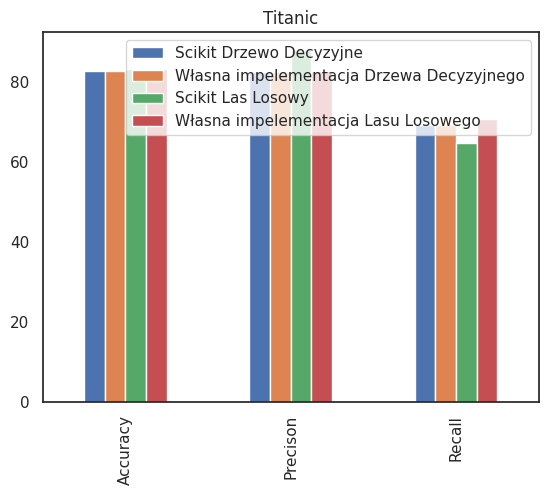

In [107]:
values = [[round(metrics.accuracy_score(Y_test_titanic, Y_pred_standard) * 100, 2),
        round(metrics.accuracy_score(Y_test_titanic, Y_pred_custom) * 100, 2),
        round(metrics.accuracy_score(Y_test_titanic, Y_pred_forest) * 100, 2),
        round(metrics.accuracy_score(Y_test_titanic, Y_pred_custom_forest) * 100, 2)],
        [round(metrics.precision_score(Y_test_titanic, Y_pred_standard) * 100, 2),
        round(metrics.precision_score(Y_test_titanic, Y_pred_custom) * 100, 2),
        round(metrics.precision_score(Y_test_titanic, Y_pred_forest) * 100, 2),
        round(metrics.precision_score(Y_test_titanic, Y_pred_custom_forest) * 100, 2)],
        [round(metrics.recall_score(Y_test_titanic, Y_pred_standard) * 100, 2),
        round(metrics.recall_score(Y_test_titanic, Y_pred_custom) * 100, 2),
        round(metrics.recall_score(Y_test_titanic, Y_pred_forest) * 100, 2),
        round(metrics.recall_score(Y_test_titanic, Y_pred_custom_forest) * 100, 2)]]
col = ['Scikit Drzewo Decyzyjne', 'Własna impelementacja Drzewa Decyzyjnego', 'Scikit Las Losowy', 'Własna impelementacja Lasu Losowego']
names = ['Accuracy', 'Precison', 'Recall']
df2 = pd.DataFrame(values, columns=col, index=names)
df2.plot(kind='bar');
plt.legend(loc='upper right')

plt.title("Titanic")

Text(0.5, 1.0, 'Dane dotyczące błędów - titanic')

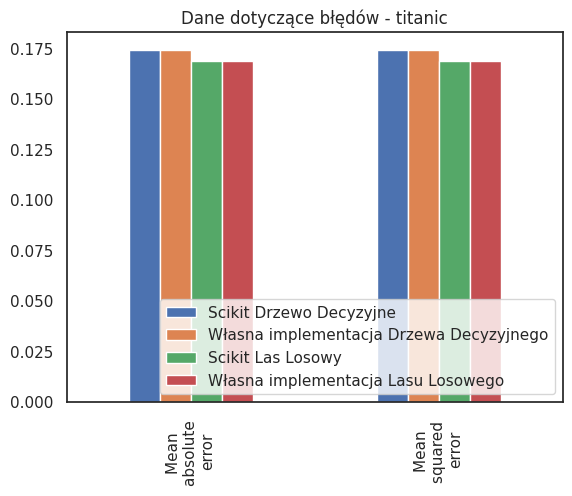

In [108]:
values_parkinson   = [[metrics.mean_absolute_error(Y_test_titanic, Y_pred_standard),
                           metrics.mean_absolute_error(Y_test_titanic, Y_pred_custom),
                           metrics.mean_absolute_error(Y_test_titanic, Y_pred_forest),
                           metrics.mean_absolute_error(Y_test_titanic,  Y_pred_custom_forest)],
                          [metrics.mean_squared_error(Y_test_titanic, Y_pred_standard),
                           metrics.mean_squared_error(Y_test_titanic, Y_pred_custom),
                           metrics.mean_squared_error(Y_test_titanic, Y_pred_forest),
                           metrics.mean_squared_error(Y_test_titanic, Y_pred_custom_forest)]]
col = ['Scikit Drzewo Decyzyjne', 'Własna implementacja Drzewa Decyzyjnego', 'Scikit Las Losowy', 'Własna implementacja Lasu Losowego']
names = ['Mean \nabsolute \nerror', 'Mean \nsquared \nerror']
df_p = pd.DataFrame(values_parkinson, columns=col, index=names)
df_p.plot(kind='bar');
plt.legend(loc=4)
plt.title("Dane dotyczące błędów - titanic")

Text(0.5, 1.0, 'Dane dotyczące błędów - Parkinson')

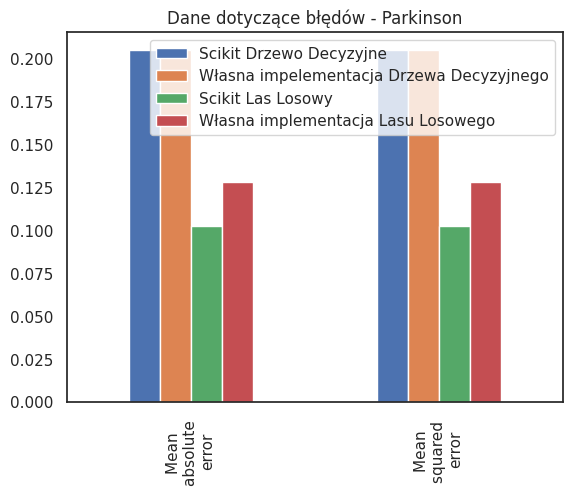

In [109]:
values_parkinson   = [[metrics.mean_absolute_error(Y_test_parkinson, Y_pred_standard_parkinson),
                           metrics.mean_absolute_error(Y_test_parkinson, Y_pred_custom_parkinson),
                           metrics.mean_absolute_error(Y_test_parkinson, Y_pred_scikit_random_forest_parkinson),
                           metrics.mean_absolute_error(Y_test_parkinson,  Y_pred_custom_forest_parkinson)],
                          [metrics.mean_squared_error(Y_test_parkinson, Y_pred_standard_parkinson),
                           metrics.mean_squared_error(Y_test_parkinson, Y_pred_custom_parkinson),
                           metrics.mean_squared_error(Y_test_parkinson, Y_pred_scikit_random_forest_parkinson),
                           metrics.mean_squared_error(Y_test_parkinson, Y_pred_custom_forest_parkinson)]]
col = ['Scikit Drzewo Decyzyjne', 'Własna impelementacja Drzewa Decyzyjnego', 'Scikit Las Losowy', 'Własna implementacja Lasu Losowego']
names = ['Mean \nabsolute \nerror', 'Mean \nsquared \nerror']
df_p = pd.DataFrame(values_parkinson, columns=col, index=names)
df_p.plot(kind='bar');
plt.title("Dane dotyczące błędów - Parkinson")

Text(0.5, 1.0, 'Czas wykonania (s)')

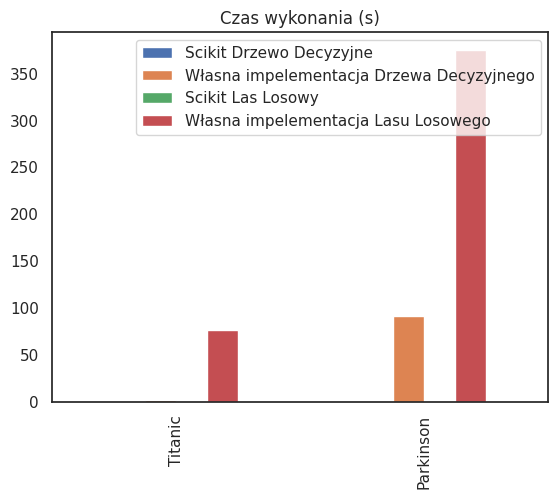

In [110]:
values_time   = [[scikit_tree_time,
                        custom_tree_time,
                        scikit_forest_time,
                        custom_forest_time],
                        [scikit_tree_time_parkinson,
                        custom_tree_time_parkinson,
                        scikit_random_forest_time_parkinson,
                        custom_forest_time_parkinson]]
col = ['Scikit Drzewo Decyzyjne', 'Własna impelementacja Drzewa Decyzyjnego', 'Scikit Las Losowy', 'Własna impelementacja Lasu Losowego']
names = ['Titanic', 'Parkinson']
df_t = pd.DataFrame(values_time, columns=col, index=names)
df_t.plot(kind='bar')
plt.title("Czas wykonania (s)")

Text(0.5, 1.0, 'Czas wykonania (s)')

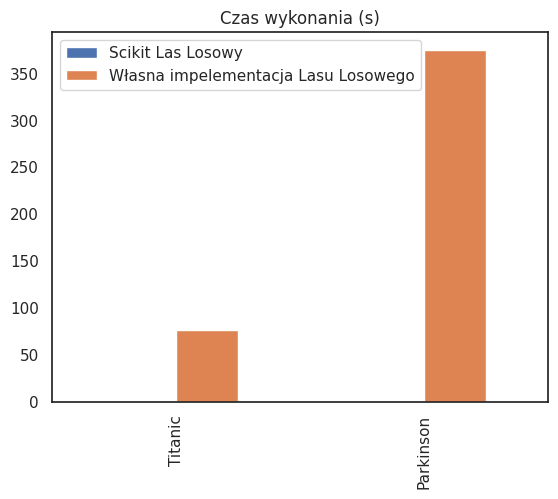

In [111]:
values_time   = [[  
                    scikit_forest_time,
                    custom_forest_time
                ],
                [
                    scikit_random_forest_time_parkinson,
                    custom_forest_time_parkinson
                ]]
col = ['Scikit Las Losowy', 'Własna impelementacja Lasu Losowego']
names = ['Titanic', 'Parkinson']
df_t = pd.DataFrame(values_time, columns=col, index=names)
df_t.plot(kind='bar')
plt.title("Czas wykonania (s)")

Text(0.5, 1.0, 'Titanic')

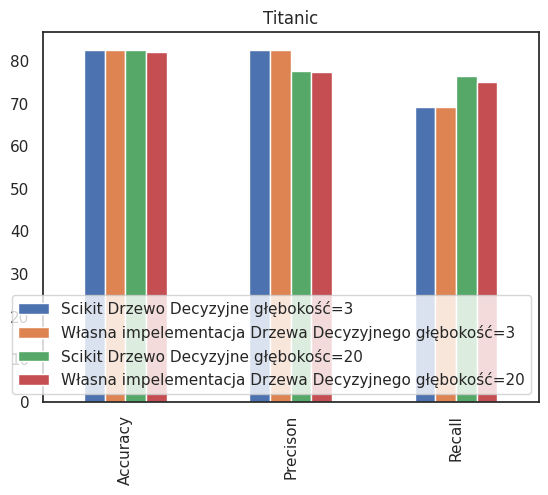

In [112]:
values = [[round(metrics.accuracy_score(Y_test_titanic, Y_pred_standard) * 100, 2),
               round(metrics.accuracy_score(Y_test_titanic, Y_pred_custom) * 100, 2),
               round(metrics.accuracy_score(Y_test_titanic, Y_pred_standard2) * 100, 2),
               round(metrics.accuracy_score(Y_test_titanic, Y_pred_custom2) * 100, 2)],
              [round(metrics.precision_score(Y_test_titanic, Y_pred_standard) * 100, 2),
               round(metrics.precision_score(Y_test_titanic, Y_pred_custom) * 100, 2),
               round(metrics.precision_score(Y_test_titanic, Y_pred_standard2) * 100, 2),
               round(metrics.precision_score(Y_test_titanic, Y_pred_custom2) * 100, 2)],
              [round(metrics.recall_score(Y_test_titanic, Y_pred_standard) * 100, 2),
               round(metrics.recall_score(Y_test_titanic, Y_pred_custom) * 100, 2),
               round(metrics.recall_score(Y_test_titanic, Y_pred_standard2) * 100, 2),
               round(metrics.recall_score(Y_test_titanic, Y_pred_custom2) * 100, 2)]]
col = ['Scikit Drzewo Decyzyjne głębokość=3', 'Własna impelementacja Drzewa Decyzyjnego głębokość=3', 'Scikit Drzewo Decyzyjne głębokośc=20', 'Własna impelementacja Drzewa Decyzyjnego głębokość=20']
names = ['Accuracy', 'Precison', 'Recall']
df2 = pd.DataFrame(values, columns=col, index=names)
df2.plot(kind='bar')
plt.legend(loc='lower right')



plt.title("Titanic")